In [4]:
import ambulance_game as abg
import matplotlib.pyplot as plt

In [24]:
lambda_1 = 1
lambda_2 = 2
mu = 5

num_of_servers = 1
threshold = 2
system_capacity = 3
buffer_capacity = 1

In [25]:
all_states = abg.markov.build_states(
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)
all_states

[(0, 0), (0, 1), (0, 2), (1, 2), (0, 3), (1, 3)]

# Paragraph 3

To visualise the list of states that are returned by the
$\texttt{build\_states}$ function, the $\texttt{visualise\_markov\_chain}$
function can be used.

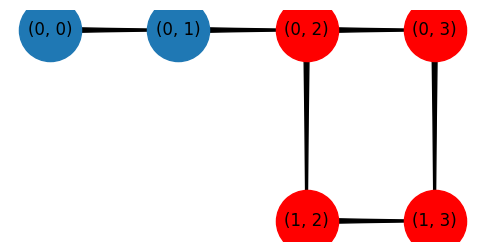

In [31]:
abg.markov.visualise_markov_chain(
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)
plt.savefig("../../visualise_markov.pdf", transparent=True)

In [32]:
Q = abg.markov.get_transition_matrix(
    lambda_1=lambda_1,
    lambda_2=lambda_2,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)
Q

array([[-3.,  3.,  0.,  0.,  0.,  0.],
       [ 5., -8.,  3.,  0.,  0.,  0.],
       [ 0.,  5., -8.,  2.,  1.,  0.],
       [ 0.,  0.,  5., -6.,  0.,  1.],
       [ 0.,  0.,  5.,  0., -7.,  2.],
       [ 0.,  0.,  0.,  5.,  0., -5.]])

In [34]:
Q_sym = abg.markov.get_symbolic_transition_matrix(
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)
Q_sym

Matrix([
[-Lambda,       Lambda,                         0,              0,              0,        0],
[     mu, -Lambda - mu,                    Lambda,              0,              0,        0],
[      0,           mu, -lambda_1 - lambda_2 - mu,       lambda_2,       lambda_1,        0],
[      0,            0,                        mu, -lambda_1 - mu,              0, lambda_1],
[      0,            0,                        mu,              0, -lambda_2 - mu, lambda_2],
[      0,            0,                         0,             mu,              0,      -mu]])

In [35]:
abg.markov.convert_symbolic_transition_matrix(
    Q_sym=Q_sym,
    lambda_1=lambda_1,
    lambda_2=lambda_2,
    mu=mu,
)

array([[-3.,  3.,  0.,  0.,  0.,  0.],
       [ 5., -8.,  3.,  0.,  0.,  0.],
       [ 0.,  5., -8.,  2.,  1.,  0.],
       [ 0.,  0.,  5., -6.,  0.,  1.],
       [ 0.,  0.,  5.,  0., -7.,  2.],
       [ 0.,  0.,  0.,  5.,  0., -5.]])

In [39]:
pi = abg.markov.get_steady_state_numerically(Q)
pi

array([0.44853393, 0.26912036, 0.16147222, 0.07381587, 0.02306746,
       0.02399016])

In [40]:
pi = abg.markov.get_steady_state_algebraically(Q)
pi

array([0.44853393, 0.26912036, 0.16147222, 0.07381587, 0.02306746,
       0.02399016])

In [41]:
abg.markov.get_mean_number_of_individuals_in_system(
    pi=pi_1, states=all_states
)

0.9786754152143147

In [42]:
abg.markov.get_mean_number_of_individuals_in_service_area(
    pi=pi_1, states=all_states
)

0.8808693869182215

In [43]:
abg.markov.get_mean_number_of_individuals_in_buffer_center(
    pi=pi_1, states=all_states
)

0.09780602829609314

In [45]:
abg.markov.get_mean_waiting_time_using_markov_state_probabilities(
    lambda_1=lambda_1,
    lambda_2=lambda_2,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

0.11946458449525936

In [46]:
abg.markov.get_mean_blocking_time_using_markov_state_probabilities(
    lambda_1=lambda_1,
    lambda_2=lambda_2,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

0.05420454545454545

In [55]:
abg.markov.proportion_within_target_using_markov_state_probabilities(
    lambda_1=lambda_1,
    lambda_2=lambda_2,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
    class_type=None,
    target=0.5,
)

0.7909590829104574